# Morphology Tutorial

Mathematical morphology (MM) is a theoretical model for digital images built upon lattice theory and topology. It is the foundation of morphological image processing, which is based on shift-invariant (translation invariant) operators.Originally developed for binary images it has now been successfully extend to grey scale images.

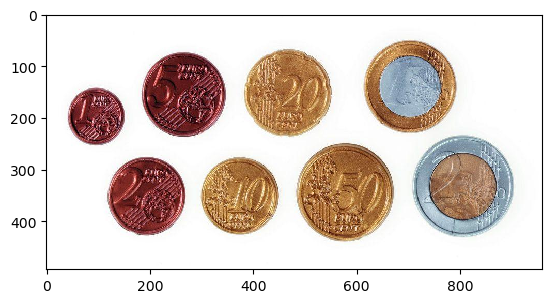

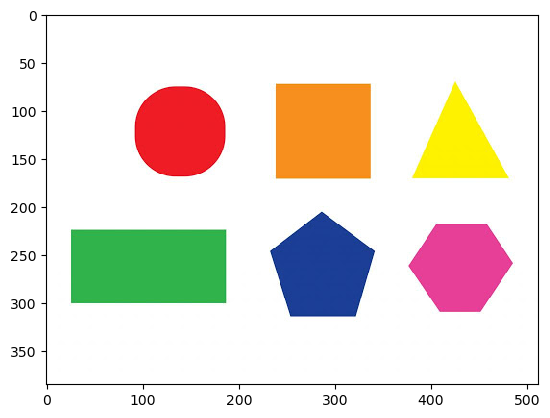

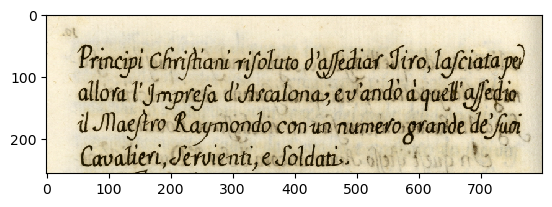

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

images = {}
for x in os.listdir("images"):
    images[x] = cv2.imread("images/" + x)
    temp = images[x][:,:,::-1]
    plt.imshow(temp, interpolation='nearest')
    plt.show()

<b style="font-size:18px;">Exercise 1.0 - Connected Components</b>

Using opencv research how to use connectedComponents() function.  
Download image shapes.jpg and euro_coins.jpg. Apply the connected components function to segment the objects in the image. You can if you want also use the findContour() opencv method to extract the ROI (seperate shapes as new images). Vary the connectivity value (4 or 8) and document results. 

<i style="color:red">Do not forget to convert the image to binary, your objects should be white.</i>

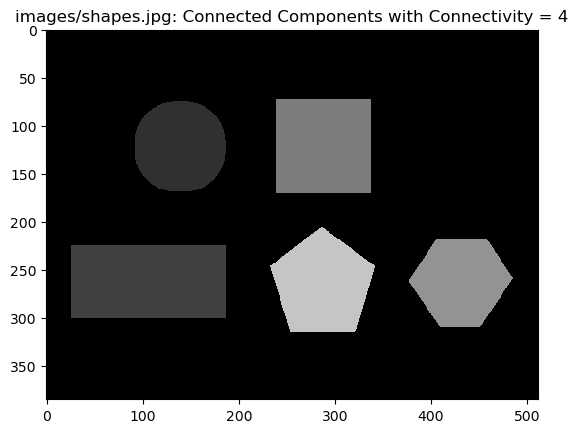

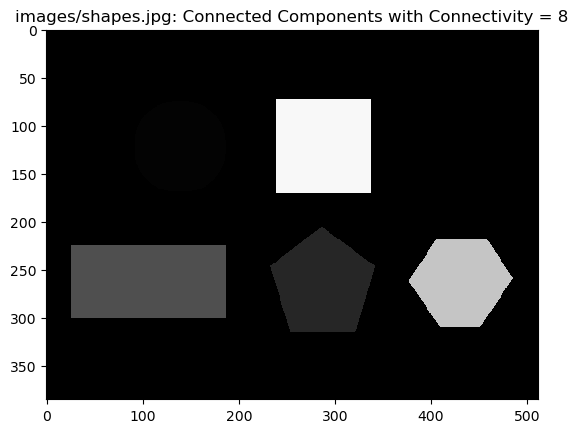

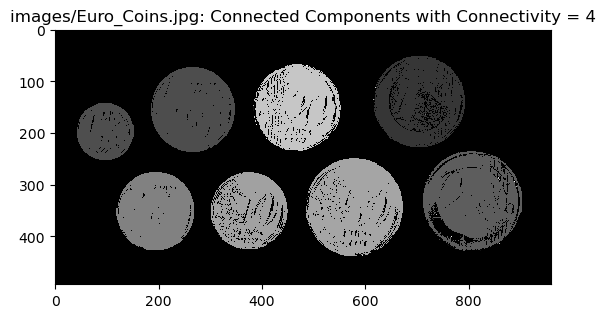

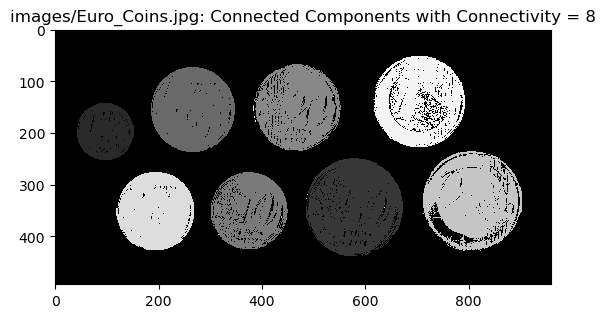

In [2]:
def connected_components(image_path, connectivity):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply thresholding to convert the image to binary format (objects should be white, background black)
    ret, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    
    # Apply connectedComponents() function
    num_labels, labels = cv2.connectedComponents(binary_image, connectivity)
    
    # Create a grayscale colormap for the output
    colormap = np.array([[0, 0, 0]] + [np.random.randint(0, 255, 1).tolist() * 3 for _ in range(num_labels)], dtype=np.uint8)
    
    # Apply the colormap to the labels
    result_image = colormap[labels]
    
    # Show the results
    plt.imshow(result_image, cmap='gray', interpolation='nearest')
    plt.title(f'{image_path}: Connected Components with Connectivity = {connectivity}')
    plt.show()

# Load the images
image_files = ["images/shapes.jpg", "images/Euro_Coins.jpg"]

for image_file in image_files:
    for connectivity in [4, 8]:
        connected_components(image_file, connectivity)

<b style="font-size:18px;">Exercise 1.1 - Dilation</b>

Download the image file handwritten text.png from VLE. Apply the opencv method for dilation (dilate()). Vary the dilation filter and compare results using histograms. What can you observe?

In [3]:
# Load the image
img = cv2.imread('images/text.png', cv2.IMREAD_GRAYSCALE)

# Convert image to binary using thresholding
ret, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

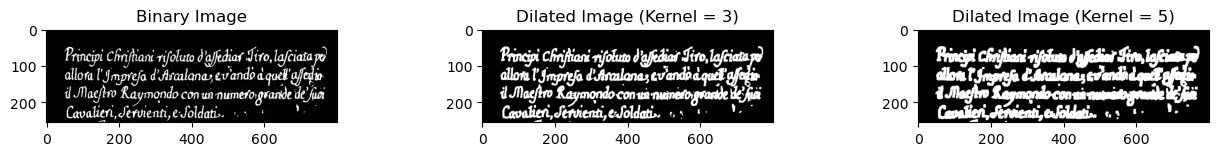

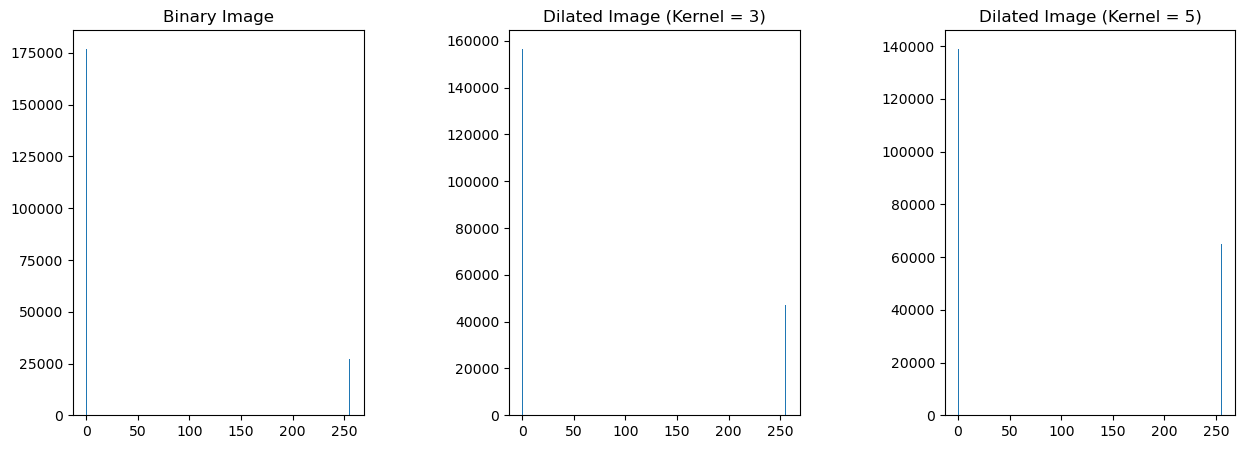

In [12]:
# Define the kernel and apply dilation with kernel size 3
kernel_size_3 = 3
kernel_3 = np.ones((kernel_size_3, kernel_size_3), np.uint8)
dilation_3 = cv2.dilate(binary_img, kernel_3, iterations=1)

# Define the kernel and apply dilation with kernel size 5
kernel_size_5 = 5
kernel_5 = np.ones((kernel_size_5, kernel_size_5), np.uint8)
dilation_5 = cv2.dilate(binary_img, kernel_5, iterations=1)

# Set the figure size
plt.figure(figsize=(15, 5))

# Display the binary, dilated images with kernel size 3 and kernel size 5
plt.subplot(1, 3, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Binary Image')

plt.subplot(1, 3, 2)
plt.imshow(dilation_3, cmap='gray')
plt.title('Dilated Image (Kernel = 3)')

plt.subplot(1, 3, 3)
plt.imshow(dilation_5, cmap='gray')
plt.title('Dilated Image (Kernel = 5)')

# Add space between subplots
plt.subplots_adjust(wspace=0.5)

plt.show()

# Set the figure size
plt.figure(figsize=(15, 5))

# Display histograms for the binary, and dilated images
plt.subplot(1, 3, 1)
plt.hist(binary_img.ravel(), 256, [0, 256])
plt.title('Binary Image')

plt.subplot(1, 3, 2)
plt.hist(dilation_3.ravel(), 256, [0, 256])
plt.title('Dilated Image (Kernel = 3)')

plt.subplot(1, 3, 3)
plt.hist(dilation_5.ravel(), 256, [0, 256])
plt.title('Dilated Image (Kernel = 5)')

# Add space between subplots
plt.subplots_adjust(wspace=0.5)

plt.show()

<b style="font-size:18px;">Exercise 1.2 - Erosion</b>

Using the same text based image from the previous exercise apply the opencv method for erosion (erode()). Vary the erosion filter and compare results using histograms. What can you observe?

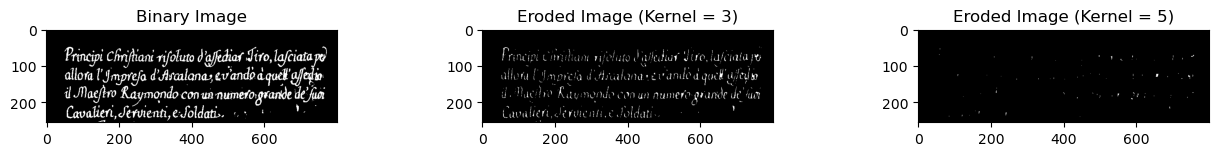

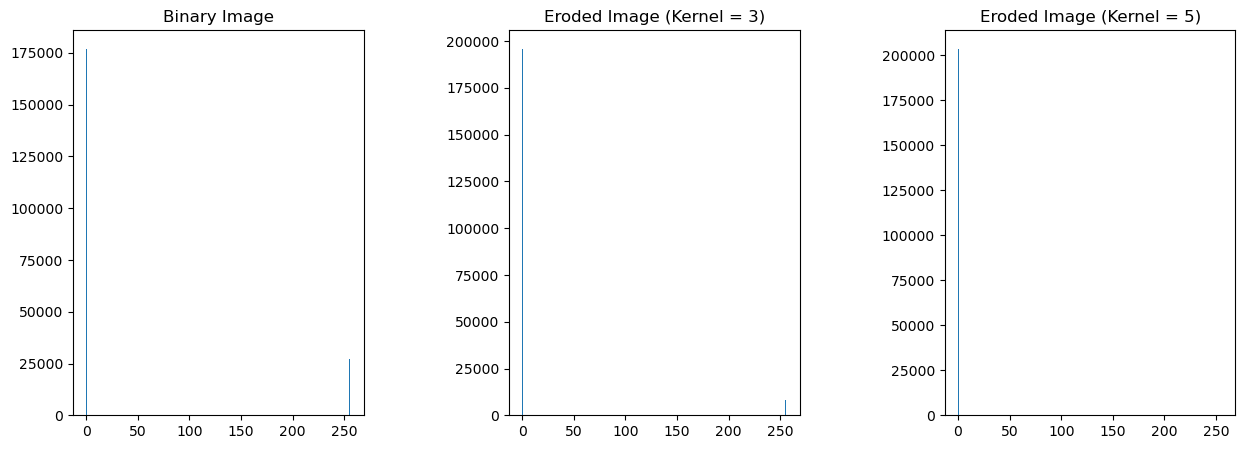

In [5]:
# Define the kernel and apply erosion with kernel size 3
kernel_size_3 = 3
kernel_3 = np.ones((kernel_size_3, kernel_size_3), np.uint8)
erosion_3 = cv2.erode(binary_img, kernel_3, iterations=1)

# Define the kernel and apply erosion with kernel size 5
kernel_size_5 = 5
kernel_5 = np.ones((kernel_size_5, kernel_size_5), np.uint8)
erosion_5 = cv2.erode(binary_img, kernel_5, iterations=1)

# Set the figure size
plt.figure(figsize=(15, 5))

# Display the binary, eroded images with kernel size 3 and kernel size 5
plt.subplot(1, 3, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Binary Image')

plt.subplot(1, 3, 2)
plt.imshow(erosion_3, cmap='gray')
plt.title('Eroded Image (Kernel = 3)')

plt.subplot(1, 3, 3)
plt.imshow(erosion_5, cmap='gray')
plt.title('Eroded Image (Kernel = 5)')

# Add space between subplots
plt.subplots_adjust(wspace=0.5)

plt.show()

# Set the figure size
plt.figure(figsize=(15, 5))

# Display histograms for the binary, and eroded images
plt.subplot(1, 3, 1)
plt.hist(binary_img.ravel(), 256, [0, 256])
plt.title('Binary Image')

plt.subplot(1, 3, 2)
plt.hist(erosion_3.ravel(), 256, [0, 256])
plt.title('Eroded Image (Kernel = 3)')

plt.subplot(1, 3, 3)
plt.hist(erosion_5.ravel(), 256, [0, 256])
plt.title('Eroded Image (Kernel = 5)')

# Add space between subplots
plt.subplots_adjust(wspace=0.5)

plt.show()

<b style="font-size:18px;">Exercise 1.3 - Opening</b>

Opening is an applied process of erosion followed by dilation. It is typically used to segment neck parts of shapes found within an image. 

It is also used in Text segmentation to seperate lines and words and sometimes characters.
Using the same text image from previous exercises apply this process of opening to visually separate lines words and characters.


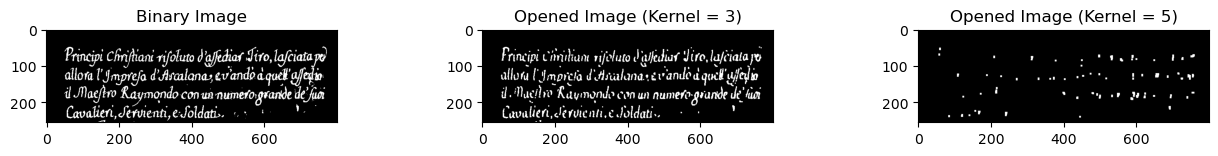

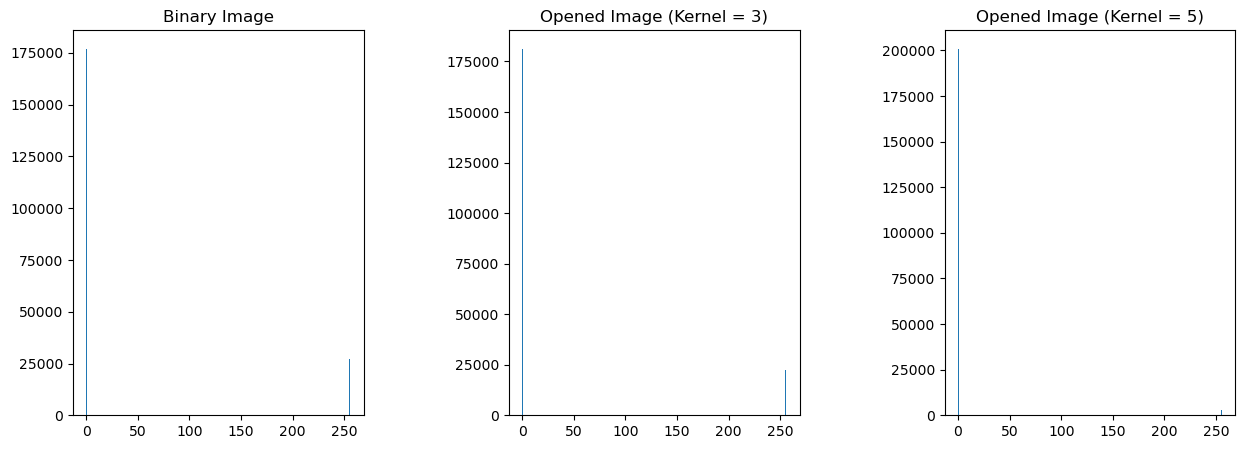

In [6]:
# Define the kernel and apply opening with kernel size 3
kernel_size_3 = 3
kernel_3 = np.ones((kernel_size_3, kernel_size_3), np.uint8)
opening_3 = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel_3)

# Define the kernel and apply opening with kernel size 5
kernel_size_5 = 5
kernel_5 = np.ones((kernel_size_5, kernel_size_5), np.uint8)
opening_5 = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel_5)

# Set the figure size
plt.figure(figsize=(15, 5))

# Display the binary, opened images with kernel size 3 and kernel size 5
plt.subplot(1, 3, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Binary Image')

plt.subplot(1, 3, 2)
plt.imshow(opening_3, cmap='gray')
plt.title('Opened Image (Kernel = 3)')

plt.subplot(1, 3, 3)
plt.imshow(opening_5, cmap='gray')
plt.title('Opened Image (Kernel = 5)')

# Add space between subplots
plt.subplots_adjust(wspace=0.5)

plt.show()

# Set the figure size
plt.figure(figsize=(15, 5))

# Display histograms for the binary, and opened images
plt.subplot(1, 3, 1)
plt.hist(binary_img.ravel(), 256, [0, 256])
plt.title('Binary Image')

plt.subplot(1, 3, 2)
plt.hist(opening_3.ravel(), 256, [0, 256])
plt.title('Opened Image (Kernel = 3)')

plt.subplot(1, 3, 3)
plt.hist(opening_5.ravel(), 256, [0, 256])
plt.title('Opened Image (Kernel = 5)')

# Add space between subplots
plt.subplots_adjust(wspace=0.5)

plt.show()

<b style="font-size:18px;">Exercise 1.4 - Closing</b>

Closing is an applied process of dilation followed by erosion. It is typically used to fill in shapes found within an image. It is also used in Text segmentation to reinforce eroded characters.

Using the same text image from previous exercises apply this process of opening to visually separate lines words and characters.


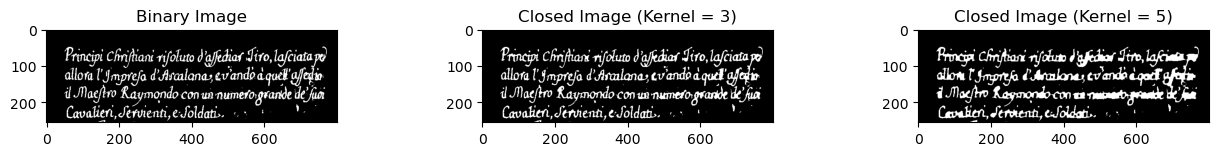

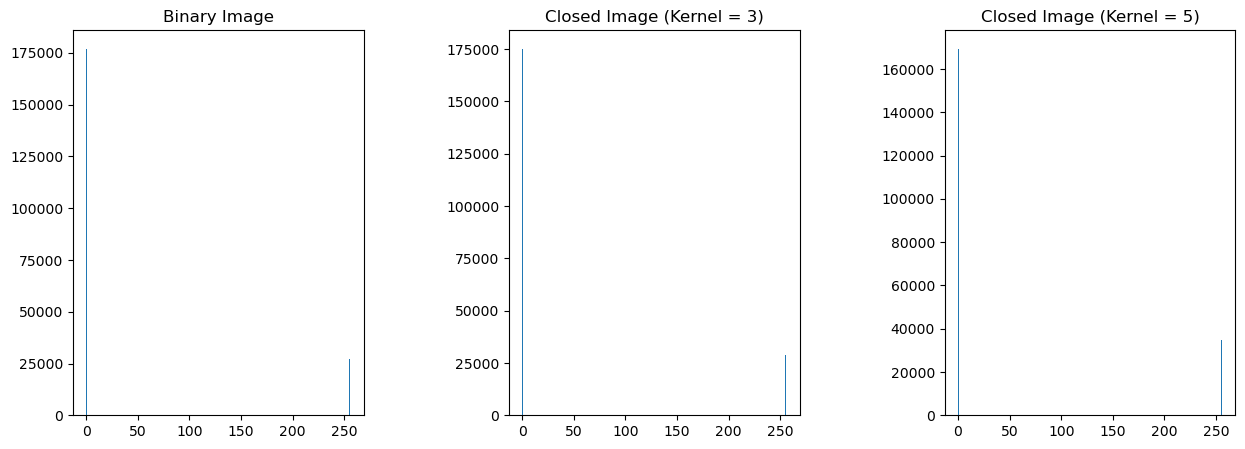

In [7]:
# Define the kernel and apply closing with kernel size 3
kernel_size_3 = 3
kernel_3 = np.ones((kernel_size_3, kernel_size_3), np.uint8)
closing_3 = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel_3)

# Define the kernel and apply closing with kernel size 5
kernel_size_5 = 5
kernel_5 = np.ones((kernel_size_5, kernel_size_5), np.uint8)
closing_5 = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel_5)

# Set the figure size
plt.figure(figsize=(15, 5))

# Display the binary, closed images with kernel size 3 and kernel size 5
plt.subplot(1, 3, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Binary Image')

plt.subplot(1, 3, 2)
plt.imshow(closing_3, cmap='gray')
plt.title('Closed Image (Kernel = 3)')

plt.subplot(1, 3, 3)
plt.imshow(closing_5, cmap='gray')
plt.title('Closed Image (Kernel = 5)')

# Add space between subplots
plt.subplots_adjust(wspace=0.5)

plt.show()

# Set the figure size
plt.figure(figsize=(15, 5))

# Display histograms for the binary, and closed images
plt.subplot(1, 3, 1)
plt.hist(binary_img.ravel(), 256, [0, 256])
plt.title('Binary Image')

plt.subplot(1, 3, 2)
plt.hist(closing_3.ravel(), 256, [0, 256])
plt.title('Closed Image (Kernel = 3)')

plt.subplot(1, 3, 3)
plt.hist(closing_5.ravel(), 256, [0, 256])
plt.title('Closed Image (Kernel = 5)')

# Add space between subplots
plt.subplots_adjust(wspace=0.5)

plt.show()

<b style="font-size:18px;">Exercise 1.5 - Segmentation</b>

Using histograms, apply any of the morphological techniques used in the previous exercises to try and segment the text into seperate lines. The lines do not have to be perfect. 

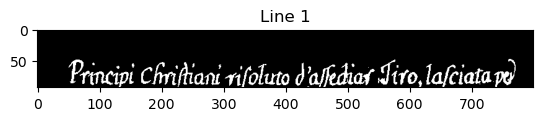

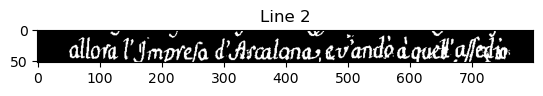

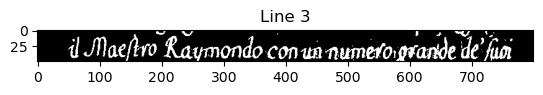

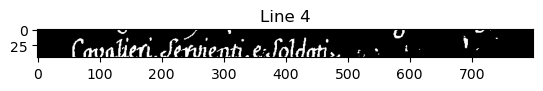

In [13]:
# Calculate the sum of pixel values along the horizontal axis for each row
def horizontal_projection(image):
    hist = np.sum(image, axis=1)
    return hist

# Iterate through the histogram to find separators based on the threshold
def find_line_separators(hist, threshold):
    separators = []
    is_separator = False
    for i, h in enumerate(hist):
        if h <= threshold and not is_separator:
            separators.append(i)
            is_separator = True
        elif h > threshold and is_separator:
            is_separator = False
    return separators

# Load the image
img = cv2.imread('images/text.png', cv2.IMREAD_GRAYSCALE)

# Convert image to binary using thresholding
ret, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# Apply dilation to fill small gaps within characters
kernel = np.ones((3, 3), np.uint8)
dilated_img = cv2.dilate(binary_img, kernel, iterations=1)

# Apply Gaussian blur along the horizontal axis
blurred_img = cv2.GaussianBlur(dilated_img, (1, 51), 0)

# Calculate horizontal projection histogram
hist = horizontal_projection(blurred_img)

# Find line separators
threshold = np.min(hist) + (np.max(hist) - np.min(hist)) * 0.5
line_separators = find_line_separators(hist, threshold)

# Separate lines of text
lines = []
for i, separator in enumerate(line_separators):
    if i < len(line_separators) - 1:
        line = binary_img[separator:line_separators[i+1], :]
        lines.append(line)
        plt.figure()
        plt.imshow(line, cmap='gray')
        plt.title(f'Line {i + 1}')

plt.show()